In [1]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('/Users/lyw/baseline/train/train.csv')
df['leaktype'] = df['leaktype'].replace(['in'],0)
df['leaktype'] = df['leaktype'].replace(['noise'],1)
df['leaktype'] = df['leaktype'].replace(['normal'],2)
df['leaktype'] = df['leaktype'].replace(['other'],3)
df['leaktype'] = df['leaktype'].replace(['out'],4)

In [3]:
dataset = df.values
X = dataset[:,1:]
print(X.shape)
Y = dataset[:,0]
print(Y)
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
# train, val = train_test_split(df, test_size=0.2, random_state=100)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.2, random_state=100)


(33600, 513)
[4 4 4 ... 1 1 1]


In [4]:
# Gaussian NB
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
Y_train = Y_train.astype('int')
model.fit(X_train, Y_train)
ynew = model.predict(X_test)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 10)
print("Gaussian NB Accuracy(cross validation):",accuracies.mean())
print("Gaussian NB Accuracy Score:", model.score(X_test,Y_test))
print('F1 Score:',f1_score(Y_test, ynew, average=None))
print('Macro F1 Score:',f1_score(Y_test, ynew, average='macro'),'\n')

Gaussian NB Accuracy(cross validation): 0.6184151785714286
Gaussian NB Accuracy Score: 0.6251488095238096
F1 Score: [0.22344828 0.42345839 0.83237136 0.21126761 0.21857923]
Macro F1 Score: 0.38182497312207164 



In [5]:
# from sklearn.metrics import confusion_matrix
# import pandas as pd
# import numpy as np
# y_test = ['a', 'a', 'b', 'c', 'd', 'd', 'e', 'a', 'c']
# y_pred = ['b', 'a', 'b', 'c', 'a', 'd', 'e', 'a', 'c']


# labels = np.unique(y_test)
# a =  confusion_matrix(y_test, y_pred, labels=labels)

# pd.DataFrame(a, index=labels, columns=labels)


In [6]:
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef

#pred=model.predict(X_test)

#labels = np.unique(Y_test)
#df_cm=pd.DataFrame(cm,index=['in', 'noise','normal','other','out'],columns=['in', 'noise','normal','other','out'])
cm=confusion_matrix(ynew,Y_test)
df_cm=pd.DataFrame(cm, index=['in', 'noise','normal','other','out'], columns=['in', 'noise','normal','other','out'])
df_cm                          #0.    1.      2.       3.       4

,in,noise,normal,other,out
in,81,33,91,112,39
noise,100,491,112,527,116
normal,119,416,3389,501,88
other,45,18,16,180,32
out,24,15,22,93,60


In [7]:
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
df_cm1 = pd.DataFrame(ynew,index = Y_test)
df_cm1


,0
2,2
2,2
2,2
2,2
3,1
...,...
2,2
2,2
3,3
0,3


In [8]:
df_cm1.reset_index(inplace=True)
df_cm1

,index,0
0,2,2
1,2,2
2,2,2
3,2,2
4,3,1
...,...,...
6715,2,2
6716,2,2
6717,3,3
6718,0,3


In [9]:
df_cm1.columns

Index(['index', 0], dtype='object')

In [10]:
#df.columns = ['col', 'col', 'col']
#df.rename(columns={'Before':'After'})

df_cm1 = df_cm1.rename(columns={'index':'real',0:'pred'})
df_cm1

,real,pred
0,2,2
1,2,2
2,2,2
3,2,2
4,3,1
...,...,...
6715,2,2
6716,2,2
6717,3,3
6718,0,3


In [11]:
df_cm1[4:5]

,real,pred
4,3,1


In [12]:
#df_cm=pd.DataFrame(cm, index=['in', 'noise','normal','other','out'], columns=['in', 'noise','normal','other','out'])
df_cm                          #0.    1.      2.       3.       4 

,in,noise,normal,other,out
in,81,33,91,112,39
noise,100,491,112,527,116
normal,119,416,3389,501,88
other,45,18,16,180,32
out,24,15,22,93,60


In [13]:
#df[df['country'] == '한국']

#df_cm1[df_cm1[0]==1].loc[1].shape
#df_cm1

#condition = (df.pclass == 1) | (df.pclass == 2)

#df_cm1[df_cm1[0]==1].shape

# df_cm2 = (df_cm1.value == 0 ) & (df_cm1.pred == 0 )
# df_cm1.loc =[df_cm2,['value','pred']] 

df_cm2 = df_cm1[df_cm1['pred']==2] 
df_cm2 = df_cm2[df_cm2['real']==0]
print(df_cm2.shape)
df_cm2[:]



(119, 2)


,real,pred
37,0,2
129,0,2
336,0,2
339,0,2
349,0,2
...,...,...
6266,0,2
6285,0,2
6318,0,2
6430,0,2


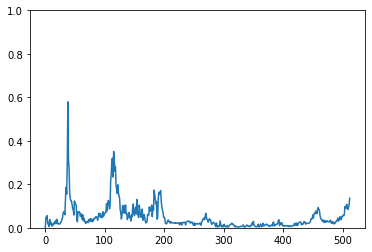

In [14]:
import matplotlib.pyplot as plt
plt.plot(X_test[104])
#plt.xlim([0, 1])      # X축의 범위: [xmin, xmax]
plt.ylim([0,1])     # Y축의 범위: [ymin, ymax]

plt.show()#in ->in

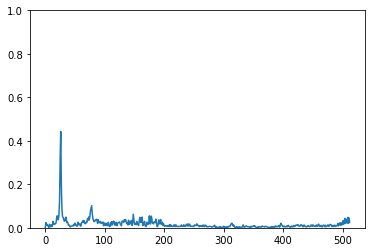

In [34]:
import matplotlib.pyplot as plt
plt.plot(X_test[129]) #in ->normal
#plt.xlim([0, 1])      # X축의 범위: [xmin, xmax]
plt.ylim([0,1])     # Y축의 범위: [ymin, ymax]

plt.show()

In [16]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
Y_train = Y_train.astype('int')
model.fit(X_train, Y_train)
ynew = model.predict(X_test)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 10)
print("LDA Accuracy(cross validation):",accuracies.mean())
print("LDA Accuracy Score:", model.score(X_test,Y_test))
print('F1 Score:',f1_score(Y_test, ynew, average=None))
print('Macro F1 Score:',f1_score(Y_test, ynew, average='macro'),'\n')

LDA Accuracy(cross validation): 0.7434151785714287
LDA Accuracy Score: 0.7452380952380953
F1 Score: [0.29103215 0.56609984 0.9090215  0.5715415  0.34850863]
Macro F1 Score: 0.5372407249087222 



In [17]:
#pred=model.predict(X_test)
cm=confusion_matrix(ynew,Y_test)
df_cm=pd.DataFrame(cm,index=['in', 'noise','normal','other','out'],columns=['in', 'noise','normal','other','out'])
df_cm

,in,noise,normal,other,out
in,86,29,6,67,34
noise,47,516,17,228,42
normal,89,207,3572,296,65
other,93,189,29,723,83
out,54,32,6,99,111


In [18]:
df_cm1 = pd.DataFrame(ynew,index = Y_test)
df_cm1

,0
2,2
2,2
2,2
2,0
3,3
...,...
2,3
2,2
3,3
0,2


In [19]:
df_cm1.reset_index(inplace=True)
df_cm1

,index,0
0,2,2
1,2,2
2,2,2
3,2,0
4,3,3
...,...,...
6715,2,3
6716,2,2
6717,3,3
6718,0,2


In [20]:
df_cm1 = df_cm1.rename(columns={'index':'real',0:'pred'})
df_cm1

,real,pred
0,2,2
1,2,2
2,2,2
3,2,0
4,3,3
...,...,...
6715,2,3
6716,2,2
6717,3,3
6718,0,2


In [21]:
#df_cm=pd.DataFrame(cm, index=['in', 'noise','normal','other','out'], columns=['in', 'noise','normal','other','out'])
df_cm                          #0.    1.      2.       3.       4 

,in,noise,normal,other,out
in,86,29,6,67,34
noise,47,516,17,228,42
normal,89,207,3572,296,65
other,93,189,29,723,83
out,54,32,6,99,111


In [22]:
df_cm2 = df_cm1[df_cm1['pred']==0] 
df_cm2 = df_cm2[df_cm2['real']==0]
print(df_cm2.shape)
df_cm2[:]

(86, 2)


,real,pred
237,0,0
288,0,0
311,0,0
382,0,0
430,0,0
...,...,...
6256,0,0
6375,0,0
6548,0,0
6549,0,0


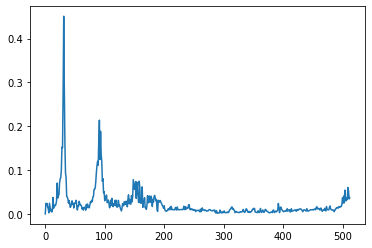

In [23]:
plt.plot(X_test[336]) #in ->other

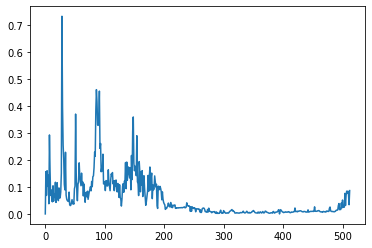

In [24]:
plt.plot(X_test[237]) #in ->in

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
Y_train = Y_train.astype('int')
model.fit(X_train, Y_train)
ynew = model.predict(X_test)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 10)
print("Logistic Regression Accuracy(cross validation):",accuracies.mean())
print("Logistic Regression Accuracy Score:", model.score(X_test,Y_test))
print('F1 Score:',f1_score(Y_test, ynew, average=None))
print('Macro F1 Score:',f1_score(Y_test, ynew, average='macro'),'\n')

/opt/anaconda3/envs/aionline/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/anaconda3/envs/aionline/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

Logistic Regression Accuracy(cross validation): 0.7509300595238094
Logistic Regression Accuracy Score: 0.7523809523809524
F1 Score: [0.21834061 0.5787013  0.91255144 0.59379408 0.26516854]
Macro F1 Score: 0.5137111931747365 



/opt/anaconda3/envs/aionline/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [26]:
pred=model.predict(X_test)
cm=confusion_matrix(Y_test,pred)
df_cm=pd.DataFrame(cm,index=['in', 'noise','normal','other','out'],columns=['in', 'noise','normal','other','out'])
df_cm

,in,noise,normal,other,out
in,50,54,87,156,22
noise,10,557,185,216,5
normal,0,27,3548,55,0
other,10,266,271,842,24
out,19,48,55,154,59


In [27]:
# Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", max_depth=100000)
Y_train = Y_train.astype('int')
model.fit(X_train, Y_train)
ynew = model.predict(X_test)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 10)
print("Decision Tree Accuracy(cross validation):",accuracies.mean())
print("Decision Tree Accuracy Score:", model.score(X_test,Y_test))
print('F1 Score:',f1_score(Y_test, ynew, average=None))
print('Macro F1 Score:',f1_score(Y_test, ynew, average='macro'),'\n')

Decision Tree Accuracy(cross validation): 0.7860491071428573
Decision Tree Accuracy Score: 0.7882440476190476
F1 Score: [0.4170096  0.66463724 0.92429285 0.71637631 0.39209726]
Macro F1 Score: 0.6228826516980592 



In [28]:
pred=model.predict(X_test)
cm=confusion_matrix(pred,Y_test,)
df_cm=pd.DataFrame(cm,index=['in', 'noise','normal','other','out'],columns=['in', 'noise','normal','other','out'])
df_cm

,in,noise,normal,other,out
in,152,46,45,77,40
noise,60,655,99,143,41
normal,38,74,3333,90,47
other,83,154,114,1028,78
out,36,44,39,75,129


In [29]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=100, random_state=0)
Y_train = Y_train.astype('int')
model.fit(X_train, Y_train)
ynew = model.predict(X_test)
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 10)
print("Random Forest Accuracy(cross validation):",accuracies.mean())
print("Random Forest Accuracy Score:", model.score(X_test,Y_test))
print('F1 Score:',f1_score(Y_test, ynew, average=None))
print('Macro F1 Score:',f1_score(Y_test, ynew, average='macro'),'\n')

Random Forest Accuracy(cross validation): 0.857514880952381
Random Forest Accuracy Score: 0.8626488095238095
F1 Score: [0.50873786 0.78516229 0.94374918 0.82206897 0.52738337]
Macro F1 Score: 0.7174203321744235 



In [30]:
pred=model.predict(X_test)
cm=confusion_matrix(pred,Y_test)
df_cm=pd.DataFrame(cm,index=['in', 'noise','normal','other','out'],columns=['in', 'noise','normal','other','out'])
df_cm

,in,noise,normal,other,out
in,131,2,0,3,10
noise,54,762,19,88,45
normal,75,118,3582,123,63
other,96,84,28,1192,87
out,13,7,1,7,130


In [31]:
print(X_test[:].shape)

(6720, 513)


In [32]:
pred.shape

(6720,)

In [33]:
Y_test.shape

(6720,)